# <center> <span style="color:blue"> Machine Learning Nanodegree Capstone Project by Roy Hu </span> </center>


# Causal Inference and Machine Learning: Pregnancy Order and Birth Weights


### <span style="color:gray"> Project Overview </span>

Machine learning methods and algorithms are revolutionizing analytics across a variety of industries: from education to healthcare to finance. Yet despite their rising popularity, I believe there is a tremendous amount of interesting and important work still yet to be done. In particular to my interests, in general ML prediction models are built on a premise that is fundamentally at odds with a lot of social science work on causal inference: a foundation of supervised ML is optimizing on an outcome and selecting a model based on the goodness of fit on a test sample. However, in econometrics, prediction is not the same thing as causal inference. For instance, in empirical economics we often see confounding situations in which higher home prices are strongly <i>positively</i> associated with higher crime rates, but mainly because cities generally have both higher real estate prices and higher crime rates. Yet obviously, all else equal, we should expect higher home prices to be <i>negatively</i> correlated with higher crime rates. Or in observational medical studies evaluating the treatment effects of drug A versus drug B, it may not be appropriate to optimize on the simple outcome because there may be good medical reasons why only certain patients receive one drug and not the other. 

Thus, a perfectly valid goal when doing empirical work in economics is to estimate the most fundamental effect of some variable on an outcome, e.g., find the causal effect of crime on price (presumably negative), as opposed to estimating simple  correlations (usually positive) between the two--since, as everyone knows, correlation does not imply causation.

But just because textbook ML prediction methods are not immediately available for causal inference does not mean that they are not useful. <b> The goal of my capstone project will be to adapt these ML methods and algorithms for causal inference. In particular, I attempt to use ML methods to estimate the causal effect of age on the birth weight of the infant--a key indicator of infant health. </b> Although one would likely imagine that increasing age has a negative effect on birth outcomes, at the same time it's possible that women who waited to have children are more established, come from better economic circumstances, and have access to better prenatal care; thus, it's possible age might be <i>positively</i> correlated with birth weights. However, my project will try to find the true causal effect of age on birth outcomes, all else equal. I use data from the CDC's National Survey for Family Growth, a particularly rich and publicly-available data set that gathers information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and men's and women's health. It is my hope that combining the latest ML algorithms with econometrics can uncover new insights into the causal effect of later pregnancies on the birth weight outcomes for infants.


### <span style="color:gray"> Problem Statement </span>

The classic framework for the causal inference problem is “potential outcomes” model developed by Neyman (1923) and extended by Rubin (1974) to non-experimental settings. Suppose we have a random
sample <i>i</i> = 1, 2,..., <i>N</i> from some population. For each unit <i>i</i> in the sample, let <i>T</i> ∈ <i>{0,1}</i> indicate whether the unit received the treatment of interest (<i>T</i>= 1) or the control treatment (<i>T</i> = 0). We are interested on the effect of the treatment <i>T</i> on an outcome <i>Y</i>. Let <i>Y<sub>i</sub></i>(1) be the potential outcome for individual <i>i</i> under treatment, and <i>Y<sub>i</sub></i>(0) the potential outcome for the same individual if he or she had not undergone the treatment.

Of course, the difficulty here, sometimes called the "Fundamental Problem of Causal Inference" (Holland 1986), is that we can never actually observe <i>both</i> potential outcomes for the <i>same</i> individual at the <i>same</i> point in time; that is, we can only observe either <i>Y<sub>i</sub></i>(1) or <i>Y<sub>i</sub></i>(0), but not both. For example, if we wanted to estimate the effect of attending college on future earnings, we would only be able to observe the wages ("the outcome") if an individual had gone to college ("the treatment"), and not the counterfactual case of wages if he or she had not. Under idealized scientific experimental conditions, randomization of the treatment and control groups will take care of the problem. However, in social sciences doing such is usually either impossible or at least highly unethical: one cannot simply randomly assign someone to attend college or not. 

To address the Fundamental Problem, the experimental design literature has developed various methods for balancing the control and treatment groups to mimic an ideal experiment ex post, the most popular being the propensity score matching. Propensity score matching splits causal inference into a <b>two-stage</b> problem. The first is to estimate the propensity score as the conditional probability of receiving the treatment, e.g., the probability of going to college, given the set of covariates, or <i>p(x)</i> = Pr(<i>T</i>=1 |  <i>X</i>=<i>x</i>). Assuming unconfoundedness, or the assumption that there are no additional confounding variables which affect both the treatment and outcome, then the causal inference problem <i>Y<sub>i</sub></i>(<i>T</i>) = (<i>T</i> | <i>X</i>) can now be simply rewritten and estimated as <i>Y<sub>i</sub></i>(<i>T</i>) = (<i>T</i> | <i>p(x)</i>). That is, instead of conditioning upon a potentially huge vector of covariates, we only need to worry about a single scalar score that takes all that information into account. While there are always arguments for additional confounding variables, this assumption is more plausible if the covariates in the data set are considered to be “rich.” As we will see later, I believe the CDC's data set is extremely rich, and it is actually quite hard to come up with any additional confounding variables. Moreover, due to the data set's huge feature space, it becomes extremely useful to summarize the information as a single propensity score. 

Machine learning algorithms can be easily adapted to causal inference here, since the first stage of estimating the propensity score probability is essentially a classic supervised learning prediction problem. In classic causal inference, the treatment is a binary variable, and the propensity score is estimated using a logistic regression. [Subsequent research](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3710547/#FD4) has shown that, however, non-parametric, machine learning techniques like a generalized boosted model often outperform the basic logistic regression, and can capture non-linear relationships. In my project, I hope to [extend](http://scholar.harvard.edu/imbens/files/hir_07feb04.pdf) the research even further by estimating a Generalized Propensity Score (Hirano and Imbens 2004) using machine learning techniques, because my treatment variable, mother's age of birth, is a continuous variable. <b> My expectation at the end of the project is to find that increasing age should have a negative effect on the infant's birth weight.</b>



### <span style="color:gray"> Metrics </span>

Because this is a regression problem, I choose mean squared errors because minimizing the quadratic loss makes sense because some errors are better than others: errors that are closer to the "true" parameter should not be penalized as much as errors that are further away. Moreover, in a non-Bayesian setting like the ones in traditional econometrics classes I've taken, MSE will asymptotically give us the minimum variance and unbiased estimators. And as as a minor note, unlike MAE, MSE is tractable and can produce closed-form solutions.


### <span style="color:gray"> Data Exploration </span>

The data comes from the CDC's National Survey of Family Growth (NSFG) 2011-2013, which contains <b>two</b> data sets: one containing pregnancy, birth, and general demographic information for different mothers, and the other containing her detailed interview responses to the survey. 

The data has an enormous feature space. The Demographic data set has 9543 observations with 278 covariates, and the Survey Response has 3096 covariates. Both data sets suffer from having many features which have a severe missing data problem. If it were missing at random, then imputation techniques like KNN or median might make sense, but I strongly suspect this not to be the case. Below is a missing map of the Survey Response data before dropping the NA columns (the Demographics one looks similar). Because the main purpose of this project is to estimate causal effects from the demographic data set, I am comfortable with trying to extract some signal from the survey data set, and will use PCA for dimensionality reduction to create orthogonal features that can provide some additional background information for each mother in the demographic data set

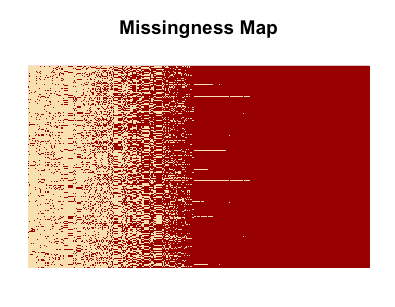

In [1]:
PATH = "/Users/royhu/Desktop/Cal Poly/Udacity/Screen Shot 2016-08-24 at 7.36.40 PM.png"

from IPython.display import Image, display; display(Image(filename=PATH))

### <span style="color:gray"> Pre-Processing </span>

The following is a summary of the pre-processing:

* <b>Demographic Data Set</b>
     * I removed observations for which the pregnancy did not end in a successful C-section or vaginal delivery, i.e., excluded observations that ended in an abortion, miscarriage, stillbirth, or NA value. 
     * I removed columns which had nearly 0 variance because they are not informative. This dropped the feature space from 278 to 121 covariates.
     * I removed columns which had nearly 0 variance because they are not informative. This dropped the feature space from 278 to 121 covariates.
     * I removed columns which had more than 10% missing values. This dropped the feature space from 121 covariates to 88 covariates.
     * Using the variable descriptions, I removed features that were redundant to avoid issues of multicollinearity; I also removed a few columns that were not relevant to my analysis. Examples of redundant variables are: addition metrics (e.g., different units) for age, birth weight, dates, education, pregnancy order. This was admittedly a judgement call, but I am fairly confident in my methodology in preserving enough covariates (40) that the data set could be still considered "rich" enough for the weakly unconfoundedness assumption to hold.
   
* <b>Survey Response Data Set</b>
     * I removed columns which had nearly 0 variance because they are not informative. This dropped the feature space from 3096 covariates to 1065 covariates.
     * I removed columns which had more than 10% missing values. This dropped the feature space from 1065 covariates to 388 covariates.
     
<b>The final PregDemographics data set has 3,135 observations with 40 covariates; the PregSurveyResponse has 3,135 observations with 388 covariates. </b>

In [2]:
# Import libraries
import numpy as np
import pandas as pd

In [3]:
# Read student data
pregDemo = pd.read_csv("/Users/royhu/Desktop/preg1.csv")
pregResponse = pd.read_csv("/Users/royhu/Desktop/pregresponse.csv")
pregResponse = pregResponse.drop('Unnamed: 0', 1)
pregDemo = pregDemo.drop('Unnamed: 0', 1)

print "Read Data Successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

pd.options.display.max_columns = 50

Read Data Successfully!


Below is a statistical description of the Demographics data set, which will be used for PCA:

In [4]:
pregDemo.describe()

,CASEID,PREGORDR,WKSGEST,BABYDOB_M,BABYDOB_Y,HPAGELB,CMFSTPRG,AGEPREG,BFEEDWKS,CMBIRTH,PREGNUM,PARITY,POVERTY,QUARTER,INTVWYEAR,BIRTHWGT
count,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,2891.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3114.000000
mean,55190.815311,2.608293,38.431260,6.627432,2016.288676,30.123126,1233.283254,26.851537,413.512625,957.348644,2.874003,2.162041,186.698565,4.489633,2012.237640,115.107258
std,2976.896115,1.469210,2.614996,4.998112,285.392377,9.578921,323.901959,5.538927,474.181186,81.354107,1.654144,1.155393,150.556606,2.278014,0.673114,23.101504
min,50002.000000,1.000000,17.000000,1.000000,1983.000000,14.000000,991.000000,12.750000,0.000000,803.000000,1.000000,1.000000,7.000000,1.000000,2011.000000,8.000000
25%,52649.500000,1.000000,38.000000,3.000000,2003.000000,24.000000,1171.000000,22.660000,13.000000,890.500000,2.000000,1.000000,64.000000,3.000000,2012.000000,103.000000
50%,55163.000000,2.000000,39.000000,7.000000,2007.000000,29.000000,1233.000000,26.410000,52.000000,958.000000,3.000000,2.000000,138.000000,5.000000,2012.000000,117.000000
75%,57718.500000,3.000000,40.000000,9.000000,2010.000000,34.000000,1287.000000,30.750000,995.000000,1019.000000,4.000000,3.000000,287.000000,6.000000,2013.000000,128.000000
max,60414.000000,9.000000,46.000000,99.000000,9999.000000,99.000000,9999.000000,43.500000,995.000000,1169.000000,16.000000,10.000000,500.000000,8.000000,2013.000000,300.000000


In [5]:
print pregDemo.shape



(3135, 40)


In [37]:
data = [graph_objs.Histogram(x=pregDemo['BIRTHWGT'])]

layout = graph_objs.Layout(
    title='Birth Weight (ounces)',
    xaxis=dict(
        title='Mother Age',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = graph_objs.Figure(data=data, layout=layout)

py.iplot(fig)

And below is a statistical description of the Survey Response data set, which will be used for PCA:

In [6]:
pregResponse.describe()

,RSCRNINF,RSCRAGE,RSCRHISP,RSCRRACE,AGE_A,AGE_R,CMBIRTH,AGESCRN,MARSTAT,FMARIT,EVRMARRY,HISP,PRIMLANG1,ROSCNT,NUMCHILD,HHKIDS18,DAUGHT918,SON918,GOSCHOL,HIGRADE,COMPGRD,DIPGED,LSTGRADE,ONOWN,ONOWN18,...,COVER12,SAMEADD,BRNOUT,RELRAISD,RELCURR,RELTRAD,ATTNDNOW,WRK12MOS,DOLASTWK1,RWRKST,WORKP12,RNUMJOB,RFTPTX,REARNTY,STAYTOG,SAMESEX,SXOK18,SXOK16,CHUNLESS,CHSUPPOR,GAYADOPT,OKCOHAB,MARRFAIL,CHCOHAB,PRVNTDIV
count,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3123.000000,3093.000000,3135.000000,3133.000000,3135.000000,...,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,2926.00000,2926.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000,3135.000000
mean,2.296970,32.381818,3.913557,4.864434,32.478150,32.478150,957.348644,32.458373,2.887400,2.886124,0.647528,3.855183,1.233493,3.874003,1.541946,1.842743,0.308134,0.319936,4.460287,13.402552,2.278258,1.838021,11.370335,3.876476,3.874322,...,3.722807,2.698246,4.242105,3.610526,3.752472,3.357576,4.245933,7.279107,2.310367,2.552791,2.097289,1.08920,1.358168,1.266667,2.726954,2.610526,2.629665,3.406061,3.371611,2.050080,2.298884,2.820096,2.632536,2.169378,2.392344
std,1.873685,6.867465,1.780521,1.048502,6.788402,6.788402,81.354107,6.876435,2.094242,1.801080,0.477816,1.812903,0.895120,1.375929,1.031760,1.102511,0.562706,0.564902,1.366806,3.720619,1.871016,1.504612,1.534858,1.800844,1.800915,...,1.870583,1.977420,1.567788,2.138731,2.356671,1.739602,2.147511,5.548728,1.579929,1.949671,1.784973,0.34971,0.509278,0.997934,1.009886,1.125990,0.866125,0.689997,0.721640,0.849779,1.099246,0.865294,0.844420,0.803840,0.960186
min,1.000000,15.000000,1.000000,1.000000,15.000000,15.000000,803.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,27.000000,1.000000,4.000000,27.000000,27.000000,890.500000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,5.000000,12.000000,1.000000,1.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,32.000000,5.000000,5.000000,32.000000,32.000000,958.000000,32.000000,2.000000,3.000000,1.000000,5.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,5.000000,13.000000,1.000000,1.000000,12.000000,5.000000,5.000000,...,5.000000,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000
75%,5.000000,38.000000,5.000000,6.000000,38.000000,38.000000,1019.000000,38.000000,5.000000,5.000000,1.000000,5.000000,1.000000,5.000000,2.000000,2.000000,1.000000,1.000000,5.000000,15.000000,5.000000,2.000000,12.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,6.000000,12.000000,4.000000,5.000000,5.000000,1.00000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000
max,7.000000,97.000000,7.000000,7.000000,45.000000,45.000000,1169.000000,97.000000,6.000000,5.000000,1.000000,9.000000,7.000000,8.000000,4.000000,5.000000,2.000000,2.000000,5.000000,99.000000,9.0000

In [7]:
print pregResponse.shape

(3135, 388)


### <span style="color:gray"> Exploratory Visualization </span> 

At this point, I still have two data sets: the <b>Demographics</b> and the <b>Survey Response</b> set. Just to get a feel for the problem at hand, the causal effect of mother's age (years) on birth weights (oz), we can visualize a scatterplot of the feature for age and the feature for birth weights.

In [8]:
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('royhu91', 'zc47pzxjzy')
import plotly.tools as tls

In [9]:
trace = graph_objs.Scatter(
    x = pregDemo['AGEPREG'],
    y = pregDemo['BIRTHWGT'],
    mode = 'markers'
)

layout = graph_objs.Layout(
    title='Age on Birthweight Scatterplot',
    xaxis=dict(
        title='Mother Age',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Infant Birthweight (oz)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [trace]
fig = graph_objs.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-scatter')

Interestingly enough, visually there does not seem to be much of an effect of age on birth weights at all; in fact, if anything, it might even be slightly positive. A simple OLS estimate of the coefficient for age is 0.009, statistically significant at the 1% level, an interesting result because it suggests that the effect on birthweights for each additional mother's year is increasing.

Of course, both theory and intuition would say that all else being equal, age should have a negative effect on birth weights. As described previously, there are many confounding factors, such as socio-economic statuses that may increase as the mother gets older. The point of this project will be to find the true causal effect of birth weights on age.

Leaving the <b>Demographics</b> data set for a moment, the next step will be to take the <b>Survey and Repsonse</b> data set, which has 388 features, and apply PCA to reduce the dimensionality and create orthogonal PCAs.

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values="NaN", strategy='mean', axis=0)
imp.fit(pregResponse)

pregResponse = imp.transform(pregResponse)

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=300)
pca.fit(pregResponse)

# Generate PCA results plot
var= pca.explained_variance_ratio_


Below is a plot of the total variance explained and the cumulative variance for the first 20 components:

In [11]:
cum_var_exp = np.cumsum(var)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,20)],
        y=var,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,20)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

As visualized above, the first principal component explains 58.09% of the variation, decreasing with each subsequent PC. I'm using the "elbow rule" to decide how many PCs to use; to me, it looks like after the 5th PC it doesn't seem worth it to include additional components. 5 principal components explains a total of 97.05% of the variation. 

In [12]:
pca = PCA(n_components=5) #Use 5 as previously identified.
pca.fit(pregResponse)

X1=pca.transform(pregResponse)
X2 = pd.DataFrame(X1)
X2['CASEID'] = pregDemo['CASEID']

Next, I will combine the two data sets into one to prepare for analysis.

In [13]:
new_data = pd.merge(pregDemo, X2,on='CASEID')
new_data.shape

(3135, 45)

I first convert factor variables into numeric and dummies, and performa a simple mean imputation for any remaining missing values:

In [14]:
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

new_data = preprocess_features(new_data)
print "Processed feature columns ({}):-\n{}".format(len(new_data.columns), list(new_data.columns))

imp = Imputer(missing_values="NaN", strategy='mean', axis=1)

imputed_DF = pd.DataFrame(imp.fit_transform(new_data))
imputed_DF.columns =new_data.columns
imputed_DF.index = new_data.index

Processed feature columns (128):-
['CASEID', 'PREGORDR', 'WKSGEST', 'BABYSEX1_Female', 'BABYSEX1_Male', 'BABYDOB_M', 'BABYDOB_Y', 'HPAGELB', 'ANYNURSE1_No', 'ANYNURSE1_Refused', 'ANYNURSE1_Yes', 'CMFSTPRG', 'ANYUSINT_No', 'ANYUSINT_Yes', "HPWNOLD_Don't know", 'HPWNOLD_No', "HPWNOLD_Not sure, Don't know", 'HPWNOLD_Refused', 'HPWNOLD_Yes', 'AGEPREG', 'FMAROUT5_NEVER MARRIED', 'FMAROUT5_divorced', 'FMAROUT5_married', 'FMAROUT5_separated', 'FMAROUT5_widowed', 'PMARPREG_1', 'PMARPREG_No', 'RMAROUT6_NEVER MARRIED, NOT COHABITING', 'RMAROUT6_cohabiting', 'RMAROUT6_divorced', 'RMAROUT6_married', 'RMAROUT6_separated', 'RMAROUT6_widowed', 'FMARCON5_NEVER MARRIED', 'FMARCON5_divorced', 'FMARCON5_married', 'FMARCON5_separated', 'FMARCON5_widowed', 'RMARCON6_NEVER MARRIED, NOT COHABITING', 'RMARCON6_cohabiting', 'RMARCON6_divorced', 'RMARCON6_married', 'RMARCON6_separated', 'RMARCON6_widowed', 'BFEEDWKS', "WANTRESP_DIDN'T CARE, INDIFFERENT", "WANTRESP_DON'T KNOW, NOT SURE", 'WANTRESP_LATER, OVERDUE

In [15]:
imputed_DF.head()

,CASEID,PREGORDR,WKSGEST,BABYSEX1_Female,BABYSEX1_Male,BABYDOB_M,BABYDOB_Y,HPAGELB,ANYNURSE1_No,ANYNURSE1_Refused,ANYNURSE1_Yes,CMFSTPRG,ANYUSINT_No,ANYUSINT_Yes,HPWNOLD_Don't know,HPWNOLD_No,"HPWNOLD_Not sure, Don't know",HPWNOLD_Refused,HPWNOLD_Yes,AGEPREG,FMAROUT5_NEVER MARRIED,FMAROUT5_divorced,FMAROUT5_married,FMAROUT5_separated,FMAROUT5_widowed,...,LABORFOR_KEEPING HOUSE,LABORFOR_NOT WORKING BUT LOOKING FOR WORK,LABORFOR_WORKING FULL-TIME,LABORFOR_WORKING PART-TIME,LABORFOR_WORKING-MATERNITY OR FAMILY LEAVE,LABORFOR_WORKING-TEMP ILL/ETC,LABORFOR_other,LABORFOR_school,RELIGION_NO RELIGION,RELIGION_OTHER RELIGIONS,RELIGION_catholic,RELIGION_protestant,METRO_Not MSA,METRO_Other MSA,METRO_Principal city of MSA,BRNOUT_No,BRNOUT_Yes,QUARTER,INTVWYEAR,BIRTHWGT,0,1,2,3,4
0,50002,1,39,0,1,8,2009,36,0,0,1,1316,1,0,0,0,0,0,1,32.83,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,6,2013,112,1045.090563,-151.222306,-93.575592,65.294351,7.762393
1,50005,1,40,1,0,7,2005,20,0,0,1,1267,0,1,0,0,0,0,1,22.16,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,7,2013,146,1264.584188,-0.471838,-76.150700,-13.906694,55.727967
2,50008,3,39,1,0,7,1994,27,0,0,1,1088,1,0,0,1,0,0,0,25.08,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,5,2012,112,-9280.254203,-875.691060,-5933.507031,2916.727466,603.871978
3,50015,4,38,0,1,9,2004,28,0,0,1,1196,1,0,0,0,0,0,1,25.16,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,6,2013,125,1298.538037,32.085047,-79.159191,-27.861786,84.874972
4,50022,1,38,0,1,11,2005,35,0,0,1,1271,0,1,0,0,0,0,1,33.16,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,2011,113,1281.396013,34.346292,-93.034921,-19.312220,44.218170


### <span style="color:gray"> Algorithms and Techniques </span>

Now that I have everything in one big data frame, I will separate the data frame into features and targets. As described previously, this is a <b>two-stage</b> problem. The <b>first stage</b> will be to estimate the propensity <i>p(x)</i> (Mother's age) given the vector of covariates (excluding the outcome, BIRTHWEIGHT). To estimate the propensity score, I will implement a simple ensemble model with three different regressors: decision tree, random forest, and gradient boosting, all with equal voting share. Even with cross-validation, algorithms like random forest can end up over-fitting, so my ensemble will serve as a check on overfitting. To refine the models further, I will also implement grid search to identify the best parameters for each algorithm.

Now that we have <i>p(x)</i>, in the <b>second stage</b> we calculate the conditional expectation of <i>Y<sub>i</sub></i> given <i>T<sub>i</sub></i> and <i>p<sub>i</sub>(x)</i>. 



### <span style="color:gray"> Implementation </span>

In [16]:
feature_cols = list(imputed_DF.columns[1:]) 
birthweight=imputed_DF['BIRTHWGT']
agepreg = imputed_DF['AGEPREG']

y_all = pd.DataFrame(imputed_DF['AGEPREG'])

#Drop Birthweight and AGE
X_all = imputed_DF[feature_cols]
X_all = X_all.drop('BIRTHWGT',1) #Target for stage 2
X_all = X_all.drop('AGEPREG',1) #Target for stage 1 


In [67]:
from sklearn import cross_validation

num_all = new_data.shape[0]  
num_train = 2350 # about 75% of the data
num_test = num_all - num_train

# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset

X_train,X_test,y_train,y_test=cross_validation.train_test_split(X_all,y_all,test_size=num_test,random_state=0)

print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])


Training set: 2350 samples
Test set: 785 samples


In [68]:
# Put any import statements you need for this code block here
from sklearn import metrics
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = metrics.mean_squared_error(y_true,y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


In [19]:
from sklearn import grid_search
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,5,6,7,8,9,10,11,12,15)}

    # Make an appropriate scoring function
    scoring_function = metrics.make_scorer(metrics.mean_squared_error,greater_is_better=False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor,parameters,scoring_function)

    # Fit the learner to the dataset to obtain the optimal model with tuned parameters
    reg.fit(X_train, y_train)

    # Return the optimal model
    return reg


# Test fit_model
try:
    reg = fit_model(X_all, y_all)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

print reg.best_score_
print reg.best_params_

Successfully fit a model!
-2.95214595376
{'max_depth': 10}


In [71]:
DTregressor = DecisionTreeRegressor(max_depth=10)
DTregressor.fit(X_all, y_all)

DTpredictions = DTregressor.predict(X_all)

print performance_metric(y_all,DTpredictions)

0.425850841754


In [81]:
DTregressor0 = DecisionTreeRegressor(max_depth=5)
DTregressor0.fit(X_all, y_all)

DTpredictions0 = DTregressor0.predict(X_all)

print performance_metric(y_all,DTpredictions0)

4.33891027401


In [83]:
from sklearn import grid_search
from sklearn.ensemble import RandomForestRegressor

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = RandomForestRegressor()
    temp = np.ravel(y_train)

    # Set up the parameters we wish to tune
    parameters = {'n_estimators':(50,100,125,150,175,200)}

    # Make an appropriate scoring function
    scoring_function = metrics.make_scorer(metrics.mean_squared_error,greater_is_better=False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor,parameters,scoring_function)

    # Fit the learner to the dataset to obtain the optimal model with tuned parameters
    reg.fit(X_train, temp)

    # Return the optimal model
    return reg


# Test fit_model
try:
    reg = fit_model(X_all, y_all)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

print reg.best_score_
print reg.best_params_


Successfully fit a model!
-1.12118265142
{'n_estimators': 150}


In [84]:
temp = np.ravel(y_all)

RFregressor = RandomForestRegressor(n_estimators=150)
RFregressor.fit(X_all, temp)

RFpredictions = RFregressor.predict(X_all)

print RFpredictions

[ 32.74553333  21.92813333  24.98726667 ...,  18.7164      30.3934
  33.56433333]


In [85]:
print performance_metric(y_all,RFpredictions)

0.120065736201


In [92]:
temp = np.ravel(y_all)

RFregressor0 = RandomForestRegressor(n_estimators=50)
RFregressor0.fit(X_all, y_all)

RFpredictions0 = RFregressor0.predict(X_all)

print performance_metric(y_all,RFpredictions0)

0.132639706463


/Users/royhu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



The Random Forest algorithm also works by splitting on nodes which give the maximum information gain. Below is a plot of which features are most important:

Confidence Intervals for random forests. generally good, but it does look like accuracy degrades around extreme values.

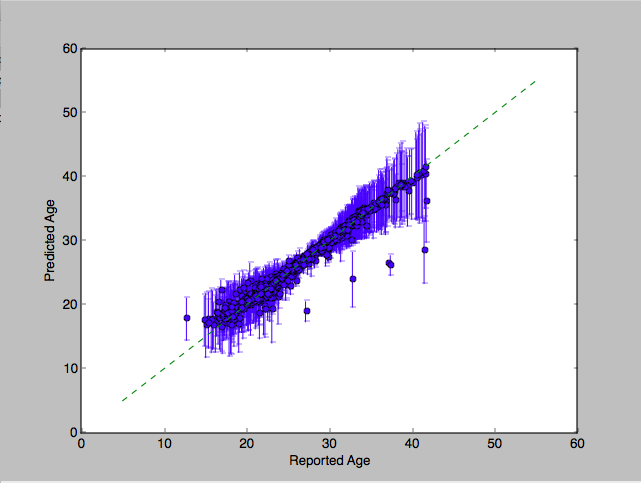

In [23]:
import forestci as fci
from matplotlib import pyplot as plt

n_trees = 175
temp = np.ravel(y_train)
temp2 = np.ravel(y_test)


age_forest = RandomForestRegressor(n_estimators=n_trees, random_state=0)
age_forest.fit(X_train, temp)
age_y_hat = age_forest.predict(X_test)

# calculate inbag and unbiased variance
age_inbag = fci.calc_inbag(X_train.shape[0], age_forest)
age_V_IJ_unbiased = fci.random_forest_error(age_forest, age_inbag,
                                            X_train, X_test)


# Plot error bars for predicted MPG using unbiased variance. 
# For some reason matplotlib not working for some reason, so I imported image from PyCharm

PATH = "/Users/royhu/Desktop/Screen Shot 2016-08-29 at 10.37.10 PM.png"

from IPython.display import Image, display; display(Image(filename=PATH))




In [90]:
from sklearn import grid_search
from sklearn.ensemble import GradientBoostingRegressor

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=100,
                                                              min_samples_leaf=50,max_depth=8,max_features='sqrt',
                                                              subsample=0.8,random_state=0)
    temp = np.ravel(y_train)

    # Set up the parameters we wish to tune
    parameters = {'n_estimators':range(100,500,50)}

    # Make an appropriate scoring function
    scoring_function = metrics.make_scorer(metrics.mean_squared_error,greater_is_better=False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor,parameters,scoring_function)
    reg = grid_search.GridSearchCV(regressor,parameters,scoring_function)

    # Fit the learner to the dataset to obtain the optimal model with tuned parameters
    reg.fit(X_train, temp)

    # Return the optimal model
    return reg


# Test fit_model
try:
    reg = fit_model(X_all, y_all)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

print reg.best_score_
print reg.best_params_


Successfully fit a model!
-1.71768745251
{'n_estimators': 450}


In [96]:
temp = np.ravel(y_all)

GBMregressor = GradientBoostingRegressor(n_estimators=450,learning_rate=0.1, min_samples_split=100,
                                                              min_samples_leaf=50,max_depth=8,max_features='sqrt',
                                                              subsample=0.8,random_state=0)
GBMregressor.fit(X_all, temp)

GBMpredictions = GBMregressor.predict(X_all)

print GBMpredictions

[ 32.62258673  22.20932789  26.18389377 ...,  18.24709912  30.39940492
  33.80229944]


In [97]:
print performance_metric(y_all,GBMpredictions)

0.147732027033


In [98]:
temp = np.ravel(y_all)
GBMregressor0 = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=100,
                                                              min_samples_leaf=50,max_depth=8,max_features='sqrt',
                                                              subsample=0.8,random_state=0)
GBMregressor0.fit(X_all, temp)

GBMpredictions0 = GBMregressor0.predict(X_all)

print performance_metric(y_all,GBMpredictions0)

1.34217296526


We can now create the Inverse Propensity Treatment score. We first check the normally distributed error terms (for IPTW):

In [26]:
a = pd.DataFrame((DTpredictions+RFpredictions+GBMpredictions)/3)
b = y_all

resid = b['AGEPREG'] - a[0]

data = [graph_objs.Histogram(x=resid)]
py.iplot(data)


Run a linear regression of age without intercepts (numerator of IPTW):

In [27]:
e = {'birth':birthweight, 'agepreg':agepreg,'resid':resid,'intercept': [1]*3135}
finalDF1 = pd.DataFrame(e)



In [28]:
import statsmodels.formula.api as sm

result = sm.ols(formula="agepreg ~ 1", data=finalDF1).fit()


In [29]:
from scipy.stats import norm

a= finalDF1['agepreg']-result.predict()
b = np.std(finalDF1['agepreg']-result.predict())
psNum=norm.pdf(a/b)

c = finalDF1['resid']
d = np.std(resid)
psDen=norm.pdf(c/d,0,1)


weights=psNum/psDen


I then create the variable for age squared, and then remove the observations for which the weights are too extreme. Extreme weights are harmful to the analysis because they increase the variance of the causal estimates.

In [30]:
finalDF1['agesq'] = finalDF1['agepreg']**2
finalDF1['weight'] = weights
finalDF1=finalDF1[finalDF1['weight'] < 2]


Plot of the weights (no extreme values):

In [31]:
data = [graph_objs.Histogram(x=finalDF1['weight'])]
py.iplot(data)

Weighted Regression with IPTWs:

In [32]:

mod_wls = sm.WLS(finalDF1['birth'], finalDF1.iloc[:,[0,2,4]], weights=finalDF1['weight'])
res_wls = mod_wls.fit(cov_type='HC3')

print res_wls.summary()


                            WLS Regression Results                            
Dep. Variable:                  birth   R-squared:                       0.005
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.600
Date:                Fri, 02 Sep 2016   Prob (F-statistic):           0.000511
Time:                        11:33:41   Log-Likelihood:                -14567.
No. Observations:                2866   AIC:                         2.914e+04
Df Residuals:                    2863   BIC:                         2.916e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
agepreg        1.0219      1.194      0.856      0.3

### <span style="color:gray"> Sensitivity Analysis </span>

In [71]:
sampleDF = finalDF1.sample(2000)

sample_mod_wls = sm.WLS(sampleDF['birth'], sampleDF.iloc[:,[0,2,4]], weights=sampleDF['weight'])
sample_res_wls = sample_mod_wls.fit()

print sample_res_wls.summary()

                            WLS Regression Results                            
Dep. Variable:                  birth   R-squared:                       0.005
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5.346
Date:                Thu, 01 Sep 2016   Prob (F-statistic):            0.00483
Time:                        14:38:25   Log-Likelihood:                -10339.
No. Observations:                2000   AIC:                         2.068e+04
Df Residuals:                    1997   BIC:                         2.070e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
agepreg        1.6660      1.994      0.836      0.4

### <span style="color:gray"> Improvement and Extension </span>

I personally found this project to be pretty rewarding because I was able to combine two of my interests, machine learning and econometrics, into one analytics project. In the pre-processing step, I was able to implement both an unsupervised machine learning technique (PCA) to massively reduce the dimensionality of the Survey Response data set into useable components, capturing over 97% of the variance in just a few principal components. Then in the first stage, I was also able to implement and refine a supervised machine learning techniques (decision tree, random forests, gradient boosting) to make fairly accurate ensemble predictions for the mother's age.
That said, there is definitely room for extension. One challenge that was just inherent in the data set was the missing value problem. I did feel like I potentially may have dropped columns that were informative; there likely was a reason why someone might not be able fill in a response in the Survey Data set, or provide an answer to the interview question in the Demographics data set. Unfortunately, despite some significant time spent looking into different imputation techniques, I'm not sure there would have been a way to impute without assuming “missingness at random.”
Another interesting extension could be more of the kinds of work that Wager is doing with bootstrapping asymptotic for machine learning algorithms. For example, I would have liked to have standard errors for gradient boosting, but there does not appear to be any published research for something like that at the moment.